In [ ]:
!pip install mglearn
#!pip install pyspark
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import mglearn
import warnings
warnings.filterwarnings('ignore')
#mglearn.plots.plot_logistic_regression_graph()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 4.6 MB/s eta 0:00:00


**Load The Dataset**

In [ ]:
data = pd.read_excel('/content/priceoye-talha_work.xlsx')
data.head()

,id,address,area,city,status,date_create,"Address Status (complete, incomplete, incorrect)"
0,446138,H E 863 Fatihabad,Cavalry Ground Extension,Lahore Cantt,delivered,2023-05-17 15:12:03,Complete
1,445160,Cavalry ground street 1 villa 1A NA Home,Cavalry Ground Extension,Lahore Cantt,delivered,2023-05-16 16:10:26,Complete
2,444253,"House No. 152A Street No 6 Block A,",Nishat Colony,Lahore Cantt,delivered,2023-05-15 18:03:23,Complete
3,444177,House no E96d Ali lane street no 7,Cavalry Ground Extension,Lahore Cantt,delivered,2023-05-15 16:55:27,Complete
4,444163,House no E96d Ali lane street no 7,Cavalry Ground Extension,Lahore Cantt,delivered,2023-05-15 16:46:02,Complete


**Data Preprocessing**

In [ ]:
data.describe()

,id
count,10000.000000
mean,439446.973000
std,8402.897954
min,424737.000000
25%,432194.750000
50%,439303.500000
75%,446410.750000
max,456847.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   id                                                10000 non-null  int64         
 1   address                                           9998 non-null   object        
 2   area                                              10000 non-null  object        
 3   city                                              10000 non-null  object        
 4   status                                            10000 non-null  object        
 5   date_create                                       10000 non-null  datetime64[ns]
 6   Address Status (complete, incomplete, incorrect)  10000 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 547.0+ KB


In [ ]:
data.shape

(10000, 7)

**Remove the Unwanted Columns from Dataset**

For Machine Learning Model Training, We need Dependent & Independent Columns (That is Helpful in Desicion Making)
In Our dataset, I'D and date_create wouldn't be fruitful in term of Decision Making. So, drop those Columns from the dataset.

In [ ]:
desire_data = data.drop(['id','date_create'],axis=1)
#desire_data = data.drop('date_create', axis=1)
desire_data.head()

,address,area,city,status,"Address Status (complete, incomplete, incorrect)"
0,H E 863 Fatihabad,Cavalry Ground Extension,Lahore Cantt,delivered,Complete
1,Cavalry ground street 1 villa 1A NA Home,Cavalry Ground Extension,Lahore Cantt,delivered,Complete
2,"House No. 152A Street No 6 Block A,",Nishat Colony,Lahore Cantt,delivered,Complete
3,House no E96d Ali lane street no 7,Cavalry Ground Extension,Lahore Cantt,delivered,Complete
4,House no E96d Ali lane street no 7,Cavalry Ground Extension,Lahore Cantt,delivered,Complete


**Rename The Class Label**

In [ ]:
desire_data.rename(columns = {'Address Status (complete, incomplete, incorrect)':'Result'}, inplace = True)
#inputs = desire_data.drop('Result',axis='columns')

**Calculate Sub Class-Labels**

In [ ]:

labels = desire_data['Result']  # brand -- Pizza brand (class label)
classes = desire_data['Result'].unique()
print(classes)


['Complete' 'Incomplete' 'Incorrect']


**Composition of Dataset**

In order to understand the composition of the dataset, I am going to look into univariate distributions (probability distribution of just one variable) by showing labels frequency with a bar plot.

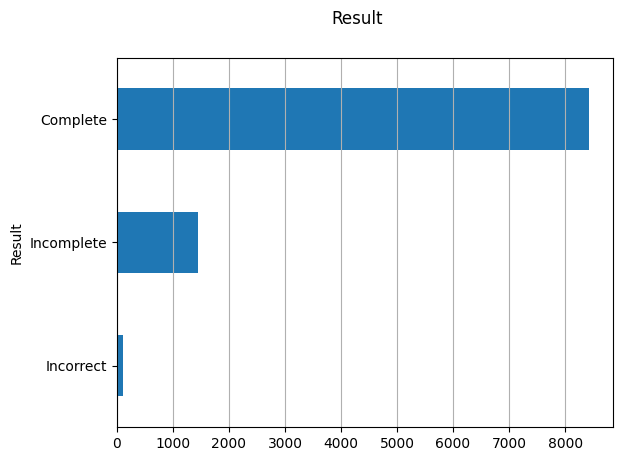

In [ ]:
x = "Result"
fig, ax = plt.subplots()
fig.suptitle(x, fontsize=12)
desire_data[x].reset_index().groupby(x).count().sort_values(by=
       "index").plot(kind="barh", legend=False,
        ax=ax).grid(axis='x')
plt.show()

**Resampling Required For the Class Label, Because It'll be Helpful During Training.**

**Count Class Labels**

In [ ]:
desire_data['Result'].value_counts()
#desire_data['Address Status (complete, incomplete, incorrect)'].count()



Complete      8432
Incomplete    1453
Incorrect      115
Name: Result, dtype: int64

**Remove Duplicates**

In [ ]:
clean_rows = desire_data.drop_duplicates()
clean_rows.head()


,address,area,city,status,Result
0,H E 863 Fatihabad,Cavalry Ground Extension,Lahore Cantt,delivered,Complete
1,Cavalry ground street 1 villa 1A NA Home,Cavalry Ground Extension,Lahore Cantt,delivered,Complete
2,"House No. 152A Street No 6 Block A,",Nishat Colony,Lahore Cantt,delivered,Complete
3,House no E96d Ali lane street no 7,Cavalry Ground Extension,Lahore Cantt,delivered,Complete
4,House no E96d Ali lane street no 7,Cavalry Ground Extension,Lahore Cantt,delivered,Complete


**Convert Class Labels Into Values**

In [ ]:
"""#dummies = pd.get_dummies(inputs.Dept_visited)

dummies = desire_data.get_dummies(clean_rows.Address Status (complete, incomplete, incorrect))
dummies.head(3)"""

'#dummies = pd.get_dummies(inputs.Dept_visited)\n\ndummies = desire_data.get_dummies(clean_rows.Address Status (complete, incomplete, incorrect))\ndummies.head(3)'

**Applying Label Encoding**

In [ ]:

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
desire_data['Result']= label_encoder.fit_transform(desire_data['Result'])

desire_data['Result'].unique()
desire_data.head()

,address,area,city,status,Result
0,H E 863 Fatihabad,Cavalry Ground Extension,Lahore Cantt,delivered,0
1,Cavalry ground street 1 villa 1A NA Home,Cavalry Ground Extension,Lahore Cantt,delivered,0
2,"House No. 152A Street No 6 Block A,",Nishat Colony,Lahore Cantt,delivered,0
3,House no E96d Ali lane street no 7,Cavalry Ground Extension,Lahore Cantt,delivered,0
4,House no E96d Ali lane street no 7,Cavalry Ground Extension,Lahore Cantt,delivered,0


**Remove Specific Area and City, From address Column**

Checking that, Address having String Data of Area.

In [ ]:
#desire_data['C'] = [x[0] in x[1] for x in zip(desire_data['address'], desire_data['area']))]
#desire_data['C'] = desire_data.apply(lambda x: x.address in x.area, axis=1)

"""
desire_data['C'] = desire_data.apply(lambda x: str(x.city) in str(x.address), axis=1)
desire_data.head(20)

"""

"\ndesire_data['C'] = desire_data.apply(lambda x: str(x.city) in str(x.address), axis=1)\ndesire_data.head(20)\n\n"

**Own  Stuff**

In [ ]:
from os import replace
#companies[companies.slogan.str.contains("secret")]

"""

print(str(desire_data['address'][0]))
print(str(desire_data['city'][0]))


#Make a String That Contains all "City" in "address" and remove all cities from address
address_cleaning = ['Lahore Cantt']
desire_data = desire_data.drop(desire_data.filter(regex='Lahore'), axis=1)
desire_data.head()
#for i in range(10000):
desire_data['address'].str.replace('Lahore','')
desire_data.head()

#DF['result'].str.replace('\+|a|b|\-|A|B', '')

#if (str(desire_data['city'][0])==str(desire_data['address'][0])):
  #print('True')

if (str(desire_data['city'][0]))in (str(desire_data['address'][0])):
  print('Yupi')

#Below Line of Code IS Detecting,that Can address column contains City Columns Data?
data = desire_data.address.str.contains(str(desire_data.city))
data.value_counts()
#desire_data.head()
  #str(desire_data['address'][0]).replace(str(desire_data['address'][0],''))
#print(desire_data['address'][0])


s = "This be a string"
#if str(desire_data['address'][0]).find(str(desire_data['city'][0])) == -1:

"""

'\n\nprint(str(desire_data[\'address\'][0]))\nprint(str(desire_data[\'city\'][0]))\n\n\n#Make a String That Contains all "City" in "address" and remove all cities from address\naddress_cleaning = [\'Lahore Cantt\']\ndesire_data = desire_data.drop(desire_data.filter(regex=\'Lahore\'), axis=1)\ndesire_data.head()\n#for i in range(10000):\ndesire_data[\'address\'].str.replace(\'Lahore\',\'\')\ndesire_data.head()\n\n#DF[\'result\'].str.replace(\'\\+|a|b|\\-|A|B\', \'\')\n\n#if (str(desire_data[\'city\'][0])==str(desire_data[\'address\'][0])):\n  #print(\'True\')\n\nif (str(desire_data[\'city\'][0]))in (str(desire_data[\'address\'][0])):\n  print(\'Yupi\')\n\n#Below Line of Code IS Detecting,that Can address column contains City Columns Data?\ndata = desire_data.address.str.contains(str(desire_data.city))\ndata.value_counts()\n#desire_data.head()\n  #str(desire_data[\'address\'][0]).replace(str(desire_data[\'address\'][0],\'\'))\n#print(desire_data[\'address\'][0])\n\n\ns = "This be a strin

In [ ]:
"""
clean_stuff = ['Lahore', 'Islamabad']


Lahore_Free = desire_data[~desire_data.address.str.contains('Lahore', na=False)]

#desire_data[~desire_data.address.str.contains(desire_data.city.str, na=False)]

#Lahore_Free.head()
Lahore_Free['address'].head()
"""

"\nclean_stuff = ['Lahore', 'Islamabad']\n\n\nLahore_Free = desire_data[~desire_data.address.str.contains('Lahore', na=False)]\n\n#desire_data[~desire_data.address.str.contains(desire_data.city.str, na=False)]\n\n#Lahore_Free.head()\nLahore_Free['address'].head()\n"

**Cities Removal From Address Column**

In [ ]:
#df = pd.DataFrame(data)
"""
# List of cities to remove from the 'City' column
cities_to_remove = ['Lahore', 'Islamabad', 'Karachi', 'Rawalpindi']

# Loop through the list of cities and drop them from the 'City' column
for city in cities_to_remove:
    #desire_data = desire_data.drop(desire_data[desire_data['address'] == city].index)

    Lahore_Free = desire_data[~desire_data.address.str.contains(city, na=False)]

#desire_data.head()

print(Lahore_Free['address'].iloc[[140, 142]])

"""
#desire_data['address'].head()

"\n# List of cities to remove from the 'City' column\ncities_to_remove = ['Lahore', 'Islamabad', 'Karachi', 'Rawalpindi']\n\n# Loop through the list of cities and drop them from the 'City' column\nfor city in cities_to_remove:\n    #desire_data = desire_data.drop(desire_data[desire_data['address'] == city].index)\n\n    Lahore_Free = desire_data[~desire_data.address.str.contains(city, na=False)]\n\n#desire_data.head()\n\nprint(Lahore_Free['address'].iloc[[140, 142]])\n\n"

**31 JULY, Task**

->Extract All Elements From Columns,
-> Convert it into a String
-> Then, Remove 'Area' Containing from 'address'

In [ ]:
"""
# List of cities to remove from the 'City' column
cities_to_remove = str(desire_data['city'])
#cities_to_remove = ['Lahore', 'lahore', 'lhr', 'LAHORE']
# Loop through the list of cities and drop them from the 'City' column
for city in cities_to_remove:
    #desire_data = desire_data.drop(desire_data[desire_data['address'] == city].index)

    City_Free = desire_data[~desire_data.address.str.contains(city, na=False)]

#desire_data.head()

City_Free.tail(10)
"""

,address,area,city,status,Result
9970,446,Block K,Lahore Model Town,delivered,2
9978,Par base nur khan dohk khaba,Scheme 3,Rawalpindi Chaklala,returned,2
9979,Dhok munshikhan chaklala gahno norani mohla ba...,Scheme 3,Rawalpindi Chaklala,delivered,2
9981,Nur Khan,22 Chungi,Rawalpindi Chakri,returned,2
9987,Giga Mall Ground floor,Phase 5,Rawalpindi DHA,delivered,2
9989,BABIA BANGLOWS NEAR ABDUL REHMAN MOSQUE MOHALA...,Phase 1,Rawalpindi DHA,returned,2
9990,Giga Mall Ground floor,Dhoke Ratta,Rawalpindi Dhoke Ratta,returned,2
9993,Ali Medical f8 Markuz,Peshawar Rd,Rawalpindi Other,delivered,2
9994,Ali Medical f8 Markuz,Peshawar Rd,Rawalpindi Other,delivered,2
9999,"2ND FLOOR CARGO SALE OFFICE, PIA BOOKING OFFIC...",Sadar,Rawalpindi Other,returned,2


**Export DataFrame City_Free**

In [ ]:
# Export the DataFrame to an Excel file
#City_Free.to_excel('lahore_free.xlsx', index=False)

#City_Free.to_excel('Again_Checking_Is_City_Free_Cleanly.xlsx', index=False)


**The above code is working fine. Now I have to built an String That Contains All 'City' as a String.**

In [ ]:
#print(City_Free['city'].value_counts())

#
print(desire_data["city"].unique())
print(type(desire_data["city"].unique()))



#city_string = str(City_Free['city'])
#city_string
#print(freq(city_string['Lahore - Cantt']))

['Lahore  Cantt' 'Lahore  Center' 'Lahore  Chaburji'
 'Lahore  Ferozpur Road' 'Rawalpindi  Misriyal' 'Rawalpindi  Morgah'
 'Rawalpindi  Murree Road' 'Rawalpindi  Other' 'Rawalpindi  Rawal Road'
 'Rawalpindi  Sadiqabad' 'Rawalpindi  Satellite Town'
 'Rawalpindi  Westridge' 'Islamabad  B' 'Islamabad  Barakahu'
 'Islamabad  D' 'Islamabad  E' 'Islamabad  F' 'Islamabad  G'
 'Islamabad  Ghauri Town' 'Islamabad  H' 'Islamabad  Highway'
 'Islamabad  I' 'Islamabad  Other' 'Karachi  AB Sinia Colony'
 'Karachi  Askari' 'Karachi  Bahria Town' 'Karachi  Baldia Town'
 'Karachi  Baloch Colony' 'Karachi  Bhimpora' 'Karachi  Bohra Pir'
 'Karachi  Bombay Bazar' 'Karachi  BufferZone' 'Karachi  Cantonment C.O.D'
 'Karachi  Cantonment Daud Pota Road' 'Karachi  Cantonment FTC'
 'Karachi  Cantonment NHS' 'Karachi  Cantonment PAF Base'
 'Karachi  Cantonment Railway Station' 'Karachi  Cantonment Regent Plaza'
 'Karachi  Cantonment ShahraeFaisal' 'Karachi  Civil Lines'
 'Karachi  Clifton' 'Karachi  DHA' 'Karach

**Alhumdullilah! City's String Has been removed from Address's Column (Below Code)**

In [ ]:
city_remove = ['Lahore  Cantt' 'Lahore  Center' 'Lahore  Chaburji'
 'Lahore  Ferozpur Road' 'Rawalpindi  Misriyal' 'Rawalpindi  Morgah'
 'Rawalpindi  Murree Road' 'Rawalpindi  Other' 'Rawalpindi  Rawal Road'
 'Rawalpindi  Sadiqabad' 'Rawalpindi  Satellite Town'
 'Rawalpindi  Westridge' 'Islamabad  B' 'Islamabad  Barakahu'
 'Islamabad  D' 'Islamabad  E' 'Islamabad  F' 'Islamabad  G'
 'Islamabad  Ghauri Town' 'Islamabad  H' 'Islamabad  Highway'
 'Islamabad  I' 'Islamabad  Other' 'Karachi  AB Sinia Colony'
 'Karachi  Askari' 'Karachi  Bahria Town' 'Karachi  Baldia Town'
 'Karachi  Baloch Colony' 'Karachi  Bhimpora' 'Karachi  Bohra Pir'
 'Karachi  Bombay Bazar' 'Karachi  BufferZone' 'Karachi  Cantonment C.O.D'
 'Karachi  Cantonment Daud Pota Road' 'Karachi  Cantonment FTC'
 'Karachi  Cantonment NHS' 'Karachi  Cantonment PAF Base'
 'Karachi  Cantonment Railway Station' 'Karachi  Cantonment Regent Plaza'
 'Karachi  Cantonment ShahraeFaisal' 'Karachi  Civil Lines'
 'Karachi  Clifton' 'Karachi  DHA' 'Karachi  F.B Area' 'Karachi  F.C Area'
 'Karachi  Firdous Colony' 'Karachi  Garden' 'Karachi  GulistaneJohar'
 'Karachi  GulshaneHadeed' 'Karachi  GulshaneIqbal'
 'Karachi  GulshaneMaymar' 'Karachi  GulzareHijri' 'Karachi  Hawksbay'
 'Karachi  I.I Chundrigarh' 'Karachi  Jamshed Road' 'Karachi  Jodia Bazar'
 'Karachi  K.D.A Officers' 'Karachi  Kagzi Bazar' 'Karachi  Kamil Gali'
 'Karachi  Kemari' 'Karachi  Khada Market' 'Karachi  Kharadar'
 'Karachi  Khudadad Colony' 'Karachi  KMCHS' 'Karachi  Korangi'
 'Karachi  Landhi' 'Karachi  Lee Market' 'Karachi  Liaquatabad'
 'Karachi  Liyari' 'Karachi  M.A Jinnah Road' 'Karachi  Malir'
 'Karachi  Mithadar' 'Karachi  Moinabad' 'Karachi  Muhammad Ali Society'
 'Karachi  Muslimabad Society' 'Karachi  Nazimabad'
 'Karachi  New Karachi Town' 'Karachi  New Surjani'
 'Karachi  Nishter Road' 'Karachi  North Karachi Sector 10'
 'Karachi  North Karachi Sector 11' 'Karachi  North Karachi Sector 2'
 'Karachi  North Karachi Sector 3' 'Karachi  North Karachi Sector 4'
 'Karachi  North Karachi Sector 5' 'Karachi  North Karachi Sector 6'
 'Karachi  North Karachi Sector 7' 'Karachi  North Karachi Sector 8'
 'Karachi  North Karachi Sector 9' 'Karachi  North Nazimabad'
 'Karachi  Orangi Town' 'Karachi  Other' 'Karachi  P.E.C.H.S'
 'Karachi  PIB Colony' 'Karachi  Pipri Goth' 'Karachi  Ramswami'
 'Karachi  Ranchorline' 'Karachi  Rizvia Society' 'Karachi  S.I.T.E'
 'Karachi  Saddar' 'Karachi  Scheme 33' 'Karachi  Shabbirabad'
 'Karachi  Shadman Town' 'Karachi  Shah Faisal Colony'
 'Karachi  Sher Shah' 'Karachi  Steel Town' 'Karachi  Sultanabad'
 'Karachi  Surjani' 'Lahore  Abbot Road' 'Lahore  Agrics' 'Lahore  Askari'
 'Lahore  Badami Bagh' 'Lahore  Baghbanpura' 'Lahore  Bahria Town'
 'Lahore  Barki Road' 'Lahore  Bata Pur' 'Lahore  BOR Society'
 'Lahore  Canal City' 'Lahore  Canal Garden' 'Lahore  Chung'
 'Lahore  Collage Road' 'Lahore  Daroghawala'
 'Lahore  Data Gunj Buksh Town' 'Lahore  Davis Road' 'Lahore  Defence'
 'Lahore  Defence Road Raiwind' 'Lahore  DHA' 'Lahore  Dharampura'
 'Lahore  Eden' 'Lahore  Eden Value Home' 'Lahore  Egerton Road'
 'Lahore  EME' 'Lahore  Empress Road' 'Lahore  Engineers Town'
 'Lahore  Faisal Town' 'Lahore  Garden Town' 'Lahore  Garhi Shahu'
 'Lahore  Green Town' 'Lahore  Gujjarpura' 'Lahore  Gulberg'
 'Lahore  GulshaneRavi' 'Lahore  Harbanspura' 'Lahore  Iqbal Avenue'
 'Lahore  Iqbal Town' 'Lahore  Izmir Town' 'Lahore  Jail Road'
 'Lahore  Jallo' 'Lahore  Johar Town' 'Lahore  Judicial Colony'
 'Lahore  Kasoor Road' 'Lahore  KhayabaneJinnah Road'
 'Lahore  Kot Lakh Pat' 'Lahore  Lawrence Road' 'Lahore  Mall Road'
 'Lahore  Manawan' 'Lahore  Mansoorah' 'Lahore  Marghzar Colony'
 'Lahore  Mcleod Road' 'Lahore  Military Accounts' 'Lahore  Model Town'
 'Lahore  Mozang' 'Lahore  Mughulpura' 'Lahore  Muhafiz Town'
 'Lahore  Nespak' 'Lahore  Other' 'Lahore  P&D Colony'
 'Lahore  Pak Arab Society' 'Lahore  PCSIR Staff Colony'
 'Lahore  PIA Road PGECHS' 'Lahore  PIA Society' 'Lahore  Punjab Society'
 'Lahore  Railway Station' 'Lahore  Raiwind Road' 'Lahore  Ravi Road'
 'Lahore  Sabzazar' 'Lahore  Salamat Pura' 'Lahore  Samnabad'
 'Lahore  Sanda Islampura' 'Lahore  Shad Bagh' 'Lahore  Shadman'
 'Lahore  Shahbagh China Scheme' 'Lahore  Shahdra' 'Lahore  Shalimar Town'
 'Lahore  Sheikhupura Road' 'Lahore  Sher Ali Road' 'Lahore  Singh Pura'
 'Lahore  Sitara Colony' 'Lahore  Sukh Chain Garden' 'Lahore  Tajbagh'
 'Lahore  Thokar Canal Road' 'Lahore  Thokar Multan Road'
 'Lahore  Town Ship' 'Lahore  Triocon Village' 'Lahore  Upper Mall'
 'Lahore  Valencia' 'Lahore  Wahdat Road' 'Lahore  Walled City'
 'Lahore  Walton' 'Lahore  Wapda Town' 'Lahore  Yateem Khana'
 'Lahore  Zarar Shaheed Road' 'Rawalpindi  Adiyala Road'
 'Rawalpindi  Afshan Colony' 'Rawalpindi  Asghar Mall'
 'Rawalpindi  Askari' 'Rawalpindi  Bahria Town' 'Rawalpindi  Chaklala'
 'Rawalpindi  Chakri' 'Rawalpindi  DHA' 'Rawalpindi  Dhoke Ratta'
 'Rawalpindi  Ghauri Town' 'Rawalpindi  Gulraiz' 'Rawalpindi  Lalazar'
 'Karachi  Manora']

for city in city_remove:
  #desire_data = desire_data.drop(desire_data[desire_data['address'] == city].index)

  City_Free_new = desire_data[~desire_data.address.str.contains(city, na=False)]

City_Free_new['address'].tail()

City_Free_new.to_excel('new_one.xlsx', index=False)

In [ ]:
desire_data['address'].head(20)

0                                    H E 863 Fatihabad 
1              Cavalry ground street 1 villa 1A NA Home
2                   House No. 152A Street No 6 Block A,
3                    House no E96d Ali lane street no 7
4                   House no E96d Ali lane street no 7 
5                 E856B st2 block G nadirabad Ali park 
6     House 21 Jalal Colony Harbanspura Near Railway...
7                         E572 Abu Bakar Saddique Road,
8                      Akrambad st 1 house no 679  st 6
9                     Cma colony street 6 house no 92 b
10             E239A3, Deen Street, Abid Road, Walton, 
11                      Akrambad st 1 house no 679 st 6
12                     Akrambad st 1 house no 679  st 6
13                      Akrambad st 1 house no 679 st 6
14                       H8,ST5, ABlock AlFaisal Town, 
15               Flat B22, Habib Flats, Habib Road, ,  
16                         Room no 1 G mess offrs BOQs 
17           House  39, Executive block, Divine 

**Find All Unique Strings in Area Column**

In [ ]:
print(City_Free_new["area"].unique())
print(type(City_Free_new["area"].unique()))


**Create a String of Unique area's**

In [ ]:
area_remove = ['Cavalry Ground Extension' 'Nishat Colony' 'Airport Road'
 'Aziz Bhatti Road Lahore Cantt' 'Shami Road Lahore Cantt' 'R.A Bazar'
 'Sadar Cantt' 'Sarwar Road Lahore Cantt' 'Sarfraz Rafiqui Road'
 'Ferozepur road' 'Abid Majeed Road Lahore Cantt'
 'Tufail Road Lahore Cantt' 'Zafar Road Lahore Cantt'
 'Bagh Ali Road Lahore Cantt' 'Khursheed Alam Road Cantt' 'Gawal Mandi'
 'Sultan Pura' 'Aitchison Society' 'Chaburji' 'Rajghar' 'Rewarz Garden'
 'Chaburji Park' 'Shamnagar' 'Gajumata' 'Chungi Amar Sidhu'
 'General Hospital' 'Nishtar Colony' 'Dhulu Khurd' 'Sofia Abad'
 'Attari Saroba' 'Ichrah' 'Qainchi' 'Chandrai Road' 'Qasori Road'
 'Venus Housing Scheme' 'Bank Stop' 'Anum Road' 'Girja Road'
 'Allama Iqbal Colony' 'PIA Colony' 'Dhamial Road' 'Misrial Road'
 'Nai Abadi' 'Dhoke Gujran' 'Siham' 'Morgah' 'Commettie Chowk'
 'Arya Mohallah' 'Liaqat Bagh' 'Waris Khan' 'Sadar' 'Shamsabad'
 'Dhok Sayedan' 'Dhoke Kashmirian' 'Khanna Pul' 'Khayaban e Sir Syed'
 'Peshawar Rd' 'Murree Road' 'Cantt' 'British Homes' 'Pindora'
 'Dhamiyal Camp' 'PF Road' 'Bani' 'Gulistan Colony' 'Gawalmandi'
 'Kohinoor Mills' 'Haider Camp PAF Residential Area' 'Amarpura'
 'Chah Sultan' 'Main Rawal Road' 'Dhoke Kala Khan' 'Muslim Town'
 'Affandi Colony' 'Falcon Complex' 'Bilal Colony' 'Dhoke Paracha'
 'Satellite Town Block F' 'Satellite Town Block B'
 'Satellite Town Block D' 'Satellite Town Block C'
 'Satellite Town Block E' 'Satellite Town Block A' 'Westridge 3'
 'Westridge 1' 'Westridge 2' 'B/17' 'Samil Dam Road' 'Dhoke Gilani'
 'Kiyani Road' 'A Block' 'E  11' 'E  9' 'E  7' 'E  8' 'E  10' 'E  16'
 'F  6' 'F  7' 'F  5' 'F  11' 'F  17' 'F  8' 'F  10' 'F  9' 'G  10' 'G  6'
 'G  9' 'G  7' 'G  5' 'G  15' 'G  12' 'G  8' 'G  11' 'G  13' 'G  14'
 'Phase 4' 'Phase 5' 'Phase 1' 'Phase 3' 'Phase 7' 'Phase 2' 'H  13'
 'H  10' 'H  12' 'H  9' 'H  8' 'H  11' 'PWD' 'Jinnah Garden'
 'River Garden' 'Khanna' 'CBR Town' 'National Police Foundation'
 'Pakistan Town' 'Soan Garden' 'Zaraj Housing Society' 'Korang Town'
 'Gulberg Green' 'Naval Anchorage' 'Media Town' 'Model Town Humak'
 'Lohi Bhair' 'Sohan' 'Sihala' 'Honda Avenue' 'I  9' 'I  8' 'I  10'
 'I  11' 'I  12' 'I  14' 'Talai Kalan' 'Lethtrar Road' 'Margalla Town'
 'Tramrri' 'Ali Pur' 'Kurri Road' 'Shahzad' 'University Town'
 'New Islamabad International Airport' 'Chatta Bakhtawar' 'Bahria Enclave'
 'Bhara Kahu' 'Banni Gaala' 'Burma Town' 'Satra Mile' 'Shakar Parian'
 'Rawal Town' 'AB Sinia Colony' 'Askari 5' 'Askari 1' 'Askari 4'
 'Askari 3' 'Precinct 10' 'Precinct 11' 'Precinct 27' 'Precinct 2'
 'Precinct 33' 'Precinct 19' 'Precinct 31' 'Precinct 1' 'Precinct 4'
 'Precinct 9' 'Baldiya Town' 'Baloch Colony' 'Bhimpora' 'Bohra Pir'
 'Bombay Bazar' 'Sector 15 B' 'Sector 15 A 5' 'Sector 16 A'
 'Sector 15 A 4' 'Sector 15 A 1' 'Sector 15 A 2' 'Sector 15 A 3' 'COD'
 'Daud Pota Road' 'Finance Trade Centre' 'Navy Housing Scheme'
 'PAF Base SharaheFaisal' 'Regent Plaza' 'Aisha bawany' 'Kashif Centre'
 'Mehran Hotel' 'CAA Colony' 'Caesar Tower' 'Civil Lines' 'Block 7'
 'Block 5' 'Block 8' 'Block 1' 'Block 2' 'Block 4' 'Block 9' 'Block 6'
 'Block 3' 'Phase 8' 'Phase 6' 'Block 10' 'Block 19' 'Block 12' 'Block 16'
 'Block 14' 'Block 13' 'Azizabad' 'Block 18' 'Karimabad' 'Block 17'
 'Block 15' 'Block 22' 'Block 11' 'Yaseenabad' 'Block 20' 'Block 21'
 'B Area' 'C Area' 'Firdous Colony' 'Garden West' 'Soldier Bazaar'
 'Garden East' 'Steel Town' 'Shah Latif Town' 'Shah Town' 'Bahadurabad'
 'Hasan Square' 'Civic Center' 'Dhoraji' 'K.D.A Scheme 1' 'GulshaneMaymar'
 'Scheme 33' 'Hawksbay' 'I.I Chundrigar' 'Jamshed Road' 'Jodia Bazar'
 'K.D.A Officers' 'Kagzi Bazar' 'Kamil Gali' 'KPT' 'Jackson Market'
 'Masaan' 'Kemari' 'Sikandarabad' 'Khada Market' 'Kharadar'
 'Khudadad Colony' 'Maqboolabad' 'Korangi Industrial Area' 'Zaman Town'
 'P&T Society' 'PAF Base Korangi Creek'
 'Abdullah Shah Noorani Pahari Colony' 'Sector 22' 'Nasir Colony'
 'Sector 19' 'Zia Colony' 'Landhi Industrial Area' 'Bhutto Nagar'
 'Muzaffarabad Colony' 'Zamanabad' 'Future Colony' 'Labour Colony'
 'Barmi Colony' 'Qasim Town' 'Ilyas Goth' 'BagheKorangi' 'Awami Colony'
 'Sharafi Goth' 'Lee Market' 'Bandhani Colony' 'Liyari' 'Chakiwara'
 'Moosa lane' 'Kumbharwara' 'Nayabad' 'Cheel Chowk' 'Baghdadi'
 'M.A Jinnah Road' 'Malir' 'Malir Cantt' 'Mithadar' 'Model Colony'
 'Adamjee Nagar' 'KDA Scheme 1' 'Bahadur Yar Jung Society'
 'Muslimabad Society' 'Sector 5F' 'Sector 5D' 'Sector 5M' 'New Surjani'
 'Nishter Road' 'Sector 10' 'Sector 11  K' 'Sector 11  E' 'Sector 11  A'
 'Sector 11  B' 'Sector 11  C 1' 'Sector 11  C 2' 'Sector 11  I'
 'Sector 11  L' 'Sector 2' 'Sector 3' 'Sector 4' 'Sector 5  L'
 'Sector 5  A 1' 'Sector 5  C 3' 'Sector 5  B 2' 'Sector 5  C 2'
 'Sector 5  A 2' 'Sector 5  M' 'Sector 5  C 4' 'Sector 5  I' 'Sector 5  K'
 'Sector 5  B 1' 'Sector 5  A 4' 'Sector 6' 'Sector 7  D 1'
 'Sector 7  D 3' 'Sector 7  D 2' 'Sector 8' 'Sector 9' 'Block L' 'Block J'
 'Block N' 'Block M' 'Block A' 'Block G' 'Block E' 'Block T' 'Block B'
 'Block C' 'Block F' 'Block H' 'Block D' 'Block I' 'Block K' 'Block S'
 'Block Q' 'Block R' 'Bangla Bazaar' 'Orangi' 'Banaras Town'
 'Sector 14  A' 'Sector 14  C' 'Mehmoodabad' 'Bin Qasim Town'
 'ShaheedeMillat Rd' 'Qayyumabad' 'Karsaz' 'ShahraeFaisal' 'West Wharf'
 'BMCHS' 'GulshaneJamal' 'National Stadium Road' 'PAF Base Masroor'
 'Nagan Chowrangi' 'Gurumandir' 'Moulvi Tamizuddin Khan Rd'
 'Jinnah International Airport' 'Banglore Town' 'Parsi Colony'
 'Sarwar Shaheed Road' 'ShahraheLiaquat' 'Tariq Road' 'Khalid Bin Walid'
 'PIB Colony' 'Pipri Goth' 'Ramswami' 'Ranchorline' 'Rizvia Society'
 'S.I.T.E' 'Golimar' 'Saddar' 'Shabbirabad' 'Shadman Sector 14  B'
 'Shadman Sector 14  A' 'Shah Faisal Colony 2' 'Shah Faisal Colony 1'
 'Shah Faisal Colony 3' 'Shah Faisal Colony 5' 'Aswan Town' 'Sher Shah'
 'QuaideAzam Park' 'Sultanabad' 'Surjani' 'Shaheen Complex'
 'Abdul Karim Road' 'Askari 11' 'Askari 10' 'Askari 9'
 'Badami Bagh Auto Market' 'Data Nagar' 'Lari Adda' 'Badami Bagh'
 'Farooq Gunj' 'Fruit Market' 'Sehar Road' 'Baghbanpura G T Road'
 'Shalamar Bagh' 'Madina Colony' 'Shawala Chowk' 'Karol Ghati'
 'Bahria Grand Mosque' 'Gulmohar Block' 'Overseas CC' 'Gardenia Block'
 'Jasmine Block' 'Bahria Homes' 'Chambelli Block' 'Ali Block'
 'QuaideAzam Block' 'Overseas A' 'Usman Block' 'Overseas BB' 'Umer Block'
 'Gulbahar Block' 'Safari Block' 'Bahria Orchard' 'Ghori Block'
 'Iris Block' 'Overseas B Extension' 'Juniper Block' 'Tulip Block'
 'Executive Lodges' 'Takbeer Block' 'New Shaheen Block' 'Nishter Block'
 'Babar Block' 'Shaheen Block' 'Nargis Block' 'Bao Wala' 'Paragon City'
 'Imperial Garden' 'Green City' 'Bata Pur' 'Qazi Town' 'Attoke Awan'
 'Block AA' 'Munir Road Lahore Cantt' 'CMH' 'Chung Adda'
 'Loharan Wala Kho' 'Chung Police Training Center' 'Baghriyan'
 'Sheraz Town' 'Revenue Society' 'Mateen Avenue' 'Ahmad Nagar'
 'Bilal Park' 'Mominpura' 'Naqsh Bandi Bazar' 'Mehmood Booti'
 'Band Road Bassi Mor' 'Nadia Ghee Mills' 'Sunny Biscuit Factory'
 'University of Veterinary & Animal Sciences' 'Davis Road'
 'Sui Gas Society' 'KB Colony' 'State Life Society' 'Ali Park Bedian Road'
 'Cantt View' 'Dream Garden' 'DHA Rehber Phase 11' 'KhaybaneAmin'
 'University of Lahore' 'US Apparel' 'HBFC Housing Society' 'Phase 9'
 'Super Town' 'Formanites Housing Society' 'Pace Woodlands'
 'Bankers Society' 'New Iqbal Park' 'Divine Gardens' 'Iqbal Park'
 'Mian Meer Colony' 'Dharampura' 'Chubacha Phatak' 'Lane Villas 2'
 'Canal Villas' 'AwaneIqbal' 'Nicholson Road' 'Police Line'
 'Phase 3 Block C 3' 'Phase 3 Block C 2' 'Phase 3 Block D 2'
 'Phase 3 Block E 3' 'GOR 5' 'Block C 1' 'Descon' 'Attari Industial Area'
 'Glaxo Town' 'Shadab Colony' 'Awan Market' 'Tariq Block' 'Ahmad Block'
 'Barkat Market' 'Tipu Block' 'Abubakar Block' 'Garden Block'
 'Aibak Block' 'Aurangzaib Block' 'Sher Shah Block' 'Attaturk Block'
 'Gharhi Shahu Bazar' 'Zaman Park' 'Habibullah Road' 'G.S 2' 'Durand Road'
 'Sector D 2 Block 5' 'Sector D 1 Block 3' 'Sector D 1 Block 1'
 'Sector D 2 Block 5 Nill' 'Sector D 2 Block 1' 'Sector D 2 Block 2'
 'Sector D 2 Block 3' 'Sector D 1 Block 5' 'Sector D 2 Block 3 Nill'
 'Sector D 2 Block 4' 'Block D  1' 'Gulberg 2 Block N' 'Gulberg 2 Block E'
 'Gulberg 4 FCC' 'Gulberg 3 Block A 3' 'Gulberg 3 Block A 1'
 'Gulberg 5 Aziz Avenue' 'Gulberg 2' 'Gulberg Guru Mangat Road'
 'Gulberg 3 Block D 1' 'Main Gullberg' 'Makkah Colony'
 'Gulberg 3 Hafeez Centre' 'M M Alam Road' 'Gulberg 3 Block B 3'
 'Gulberg 3 Block M' 'Gulberg 3 Block C 2' 'Gulberg 3 Gopal Nagar'
 'Gulberg 3 Falcon Complex' 'Gulberg 3 Block C 3' 'Gulberg 2 Block C'
 'Cavalary Ground' 'Gulberg 2 Block B' 'Gulberg 2 Block H'
 'Gulberg 3 Block B 2' 'Gulberg 3 Firdous Market' 'Gulberg 2 Block K'
 'Gulberg 3 Block E 1' 'Gulberg 5 Zafar Ali Road' 'Gulberg 2 Block T'
 'Gulberg 4 FCC Kachi Basti' 'Gulberg 2 Canal Park' 'Gulberg 2 Block A'
 'Gulberg 3 Block B 1' 'Gulberg 3 Block C 1' 'Gulberg 2 Block R'
 'Gulberg 2 Block G' 'Gulberg 2 Block F' 'Gulberg 3 Block K'
 'Gulberg 3 Block A 2' 'Gulberg 2 Block D' 'Gulberg 2 Block P'
 'Qasim Pura' 'Gulberg 3 Block G' 'Gulberg 4 Old FCC'
 'Gulshan Ravi Lahore' 'Nonariyan Chowk' 'Gulberg Gulshan Ravi Lahore'
 'Harbanspura' 'Taj Bagh Phase 3' 'Maher Fayaz Colony'
 'Canal Bank Housing Society' 'Amir Town' 'Fatehgarh' 'Pepsi Stop'
 'Lahore Press Club Housung Society' 'Hajveri Scheme' 'Sami Town'
 'Taj Bagh Phase 1' 'Phase 1 Block A' 'Phase 3 Block A' 'Kamran Block'
 'Pak Block' 'Neelam Block' 'Neezam Block' 'Kashmir Block' 'Badar Block'
 'Kareem Block' 'College Block' 'Raza Block' 'Jahanzaib Block'
 'Hunza Block' 'Satluj Iqbal' 'Ravi Block' 'Khyber Block' 'Al Hamd Colony'
 'Zeenat Block' 'Rachna Block' 'Najaf Colony' 'Sikandar Block'
 'Mehran Block' 'Chanab Block' 'Muslim Block' 'Jail Road' 'Qartaba Chowk'
 'Lahore Women College & University' 'Bird Wood Road' 'Race Course'
 'Lahore Medical Housing Society Phase 2' 'Jallo Pind'
 'Al Raheem Gardens Phase 4' 'Umer Khan Road' 'Jallo Park' 'Block G 1'
 'Block F 1' 'Block E 1' 'Block D 2' 'Block H 1' 'Block A 2' 'Block B 2'
 'Block H 3' 'Block F 2' 'Block R 1' 'Block E 2' 'Block C 2' 'Block D 1'
 'Block G 4' 'Block J 3' 'Block A 1' 'Block H 2' 'Block J 1' 'Block P'
 'Block B 3' 'Block G 3' 'Block J 2' 'Block B 1' 'Block A 3'
 'Samsani Khoi Road' 'Block R 2' 'Central Park' 'Kahna Nau' 'Kahna Old'
 'Nashemaneiqbal Phase 1' 'Airline Society' 'Gulshan e Lahore'
 'OPF Society' 'Kot Lakh Pat Indutrial Area' 'Kot Lakh Pat Staion Area'
 'Peco Road' 'Modern Colony' 'Liaqatabad' 'China Chowk' 'Race Course View'
 'Hall Road' 'GOR 1' 'ShahraheQuaideAzam' 'Aitchison College'
 'Sadiq Plaza' 'Yadgare Shuhada' 'Manawan Training Center'
 'Bismillah Housing Society' 'Azam Garden' 'Hassan Town' 'Awan Town'
 'Mansoorah' 'Ittehad Town' 'KhaybaneQuaid' 'Rana Town'
 'King Edward Medical University' 'Patyala Ground' 'Lahore Hotel'
 'Lakshmi Chowk' 'Model Town Link Road' 'Kosar Colony' 'Fane Road'
 'Abid Market' 'Mozang Road' 'Temple Road' 'Lytton Road' 'Mozang Chungi'
 'New Mozang' 'Queen Road' 'Lalpul' 'Ghaziabad' 'Gunj Bazar'
 'Mughulpura Canal Road' 'Taj Pura' 'Naya Pull' 'M.E.T 2' 'Ram Gar Bazar'
 'Shalamar Hospital' 'Sahowari Road' 'Shalimar Link Road' 'Fatehgarh Road'
 'M.E.T 1' 'Nabi Pura' 'Madni Colony' 'Mughulpura' 'Ayaz Town'
 'Lahore Dry Port' 'Ghulshan Park' 'Phase 3 Block B' 'Phase 2 Block C'
 'Phase 2 Block B' 'Phase 1 Block D 1' 'Phase 2 Block A'
 'Phase 1 Block C 1' 'Kot Abdul Malik' 'Jubilee Town' 'Haloki'
 'NFC HOUSING SOCIETY' 'Multan Road' 'Rehman Garden Phase 2'
 'Abdalian Housing Society' 'Kot Lakhpat' 'Urdu Bazar' 'Thokar Niaz Baig'
 'Parkview City' 'Rehman Garden Phase 1' 'Band Road'
 'State Life Housing Society' 'Muslim Nagar Housing Society' 'Youhanabad'
 'Swami Nager' 'Begum Kot' 'Nadir Abad (Badian Road)' 'Anarkali Bazaar'
 'Manga Road' 'Lower Mall' 'Chanar Bagh' 'Block BB' 'Phase 1 Block A 2'
 'Phase 1 Block A 4' 'Phase 2 Block E' 'Phase 1 Block A 1'
 'Phase 1 Block B 2' 'Haji Camp' 'Austrailia Masjid' 'Branth Road'
 'Railway Road' 'Bhoptian Chowk' 'Abdul Sattar Edhi Road' 'Nawab Town'
 'Sher Shah Colony' 'Sundar Industrial Estate' 'Lake City' 'Dubai Town'
 'Ali Raza Abad Rawind Road' 'Ali Town' 'Sultan Town' 'Etihad Town'
 'AWT Phase 2' 'Shareef Medical Jati Umra' 'Shabbir Town' 'Qila Muhammadi'
 'Timber Market' 'Karim Park Ravi Road' 'Sabzazar' 'Said Pur'
 'Deen Daran Ki Pulli' 'Salamat Pura' 'Samnabad' 'Ittehad Colony'
 'Pakki Thatti' 'Nadeem Shaheed Road' 'Arya Nagar' 'Bastami Road'
 'Poonch Road' 'Muslim Road' 'Bara Sanda' 'Dev Samajh Road' 'Sanat Nagar'
 'Haider Road' 'Islampura' 'Chohan Road' 'Prem Nagar' 'Chota Sanda'
 'Sanda Road' 'Krishan Nagar' 'Outfall Road' 'National Town'
 'Nakhuda Chowk' 'Amir Road' 'Ghoray Shah' 'Kot Khawaja Saeed'
 'Baghat Pura' 'Wassan Pura' 'Iqbal Road' 'Goal Bagh' 'Kachupura'
 'Fazal Park 1' 'Chahmiran' 'Misri Shah' 'Shadman 1' 'Shahjamal'
 'Shadman 2' 'China Scheme' 'Gujjar Pura' 'Chamra Mandi' 'Bhogi Wall'
 'Begamkot Sharkpur Road' 'Shahdra Town' 'Imamia Colony' 'Shalimar Town'
 'Kotli Peer Abdul Rehman' 'Rasheed Pura' 'Bijli Ghar' 'Noha Wala Chowk'
 'Pakistan Mint' 'Sheikhupurea' 'Rehman Society' 'UET Lahore Campus'
 'Begum Pura' 'Singh Pura' 'Colony 1' 'New Canal Park' 'Canal View'
 'Eden Canal Villas' 'Westwood Colony' 'Tech Society' 'Doctors Society'
 'Green Fort 2' 'Gul Bahar Colony' 'Rail Town' 'Hanjarwal Road'
 'Park View Villas' 'Shah Pur Kanjra' 'Orient Factory' 'Sector B 2'
 'Sector A 2' 'Sector B 1' 'Sector C 1' 'Sector A 1' 'Block D1'
 'Sector C1' 'Mochi Pura' 'Sector C 2' 'Upper Mall Scotch Corner'
 'Upper Mall' 'Naz Town' 'UET Society' 'Valencia Town'
 'Nashemaneiqbal Phase 2' 'Audit Accounts Society' 'Naqsha Stop'
 'New Muslim Town' 'Education Town' 'Punjab University New Campus'
 'Rehman Pura' 'Clifton Colony' 'Mustafa Town' 'Wahdat Colony'
 'Old Muslim Town' 'Bhati Gate' 'Shah Alam Market' 'Pani Wala Talab'
 'Dehli Gate' 'Akbari Gate' 'Mochi Gate' 'Taxali Gate' 'Walton Road'
 'Railway Officers Colony' 'NFC Housing Society' 'Sodiwal' '60 Feet Road'
 'Chappar Stop' 'Niazi Adda' 'Kot Kamboh' 'P.A.F New Officer Coloney'
 'Guldasht Town' 'Jory Pull Harbanspura Road' 'Al Faisal Town'
 'Tulsa Road' 'Gulshan Abad' 'Adiyala Road' 'Munawar Colony' 'Ghorak Pur'
 'Afshan Colony' 'Afzal Town' 'Dhoke Chaudrian' 'Lalkurti' 'Eid Gah'
 'Asghar Mall' 'Raja Bazar' 'Dhoke Dalal' 'Askari 14' 'Askari 7'
 'Phase 8 (Extension)' 'Scheme 3'
 'Airport Employees Cooperative Housing Society' 'Scheme 1' 'Scheme 2'
 'Dayaml Road' 'Tench Bata' 'Chakri Road' 'Bakra Mandi' 'Dhoke Hassu'
 'Dhoke Ratta' 'New Lalazar' 'Old Lalazar' 'Chakra' 'Friends Colony'
 'Kinnaird College' 'Chrisitan Colony' 'Ahmed Town'
 'Karnal Aman Ullah Road' 'Aabpara Market' 'Wapda Colony' 'Precinct 8'
 'Sector 16 B' 'B1 Area' 'GulshaneRehman' 'Manora' 'Sector 11  C 3'
 'Jallo More Bazar' 'Al Rehman Garden Phase 3'
 'Abdulrehman Road Lahore Cantt' 'Oqaf Colony' 'Kashmir Road' 'Shama Road'
 'Green Caps' 'Awami Complex' 'Bibi Pak Daman' 'Gulberg 5 Bridge Colony'
 'Fatehabad' 'Gulberg 3 Block H' 'Gulberg 3 Block J' 'Gulberg 2 Block Q'
 'Tulspura' 'Nawab Pura' 'Canal Point Housing Society' 'Canal Fort 2'
 'Sozo Water Park' 'Lahore Medical Housing Society Phase 1'
 'Pakistan Stock Exchange' 'Regal Chowk' 'Shahdin Manzil' 'Beadon Road'
 'Al Hafeez Housing Society' 'Marghzar Colony' 'Nisbat Road'
 'Shahpur Kanjra' 'Pak Arab Society Vittal Homes' 'Wara Sattar'
 'Islamia Park' 'Muslim park' 'Rang Wala Karkhana'
 'Sheikhupura  Faisalabad Rd' 'Colony 2' 'Faiz Road' 'Lohari Gate'
 'Mori Gate' 'Moti Bazar' 'Khuda Baksh Road' 'Shezan Factory'
 'Dokh Sydaan' 'Dehri Village Road' 'Railway Colony' 'Sayaam'
 'Spring Valley' 'Phul Garan' '22 Chungi']

**Remove area's Column String From address's Column**

In [ ]:
for area in area_remove:
  #desire_data = desire_data.drop(desire_data[desire_data['address'] == city].index)

  Area_Free_new = desire_data[~desire_data.address.str.contains(area, na=False)]

Area_Free_new['address'].tail()

Area_Free_new.to_excel('area_free.xlsx', index=False)

**By Applying Regex, Remove Unnecessary Expressions such as (, . ' )**

In [ ]:
!pip install regex
import regex as re


# put the special characters in a list
special_char = ['"', '*', '/', '(', ')', ':', '\n','[',']',"'", ',','.']

special_char_escaped = list(map(re.escape, special_char))

Area_Free_new['address'] = Area_Free_new['address'].replace(special_char_escaped, '', regex=True)
Area_Free_new.head()

,address,area,city,status,Result
0,H E 863 Fatihabad,Cavalry Ground Extension,Lahore Cantt,delivered,0
1,Cavalry ground street 1 villa 1A NA Home,Cavalry Ground Extension,Lahore Cantt,delivered,0
2,House No 152A Street No 6 Block A,Nishat Colony,Lahore Cantt,delivered,0
3,House no E96d Ali lane street no 7,Cavalry Ground Extension,Lahore Cantt,delivered,0
4,House no E96d Ali lane street no 7,Cavalry Ground Extension,Lahore Cantt,delivered,0


**Export Data, That Contains Address's Column Free from Area's & City's Column**

In [ ]:
Area_Free_new.to_excel('1_7_23(Sheet).xlsx', index=False)

In [ ]:

import pyspark.sql.functions as F
desire_data('flag', F.when((F.col("address") == F.col("city") ), 1).otherwise(2)).show()

ModuleNotFoundError: ignored

In [ ]:
import numpy as no
#df['C']=np.select([df.A=='No animal', df.A.str.match('Zoo.*') & df.B.str.match('\w{2}[.].'), df.A.str.match('\w{2}-.+-.+') & df.B.str.match('GB.+')], [df.B, df.A,df.A])
desire_data['new']=np.select((desire_data['address'].str)=(desire_data['city'].str)
desire_data.head()

In [ ]:
#req_list = desire_data['area', 'city']

desire_data[desire_data['address'].str.contains(desire_data['area'])]

#df[df['Requirements'].str.contains(fr"\b(?<!\d/)(?:{'|'.join(req_list)})\b")]

In [ ]:

"""

for i in desire_data['address']:
  if (desire_data.apply(lambda x: str(x.address) in str(x.area), axis=1)):
"""

In [ ]:
"""
desire_data = desire_data[~desire_data['address'].str.contains(desire_data['area'].astype(str))]
desire_data.head()
"""

In [ ]:
#df['text_column'] = df['text_column'].str.replace(string_to_remove, '')

#Below Line of code, checking columns data, within column
#if (desire_data.apply(lambda x: str(x.address) in str(x.area), axis=1)):
#  desire_data[~desire_data['area'].str.contains(desire_data['address'].astype(str))]
desire_data.apply(lambda x: str(x.address) in str(x.area), axis=1)
#desire_data['result'] = [any(s in area for s in lst)
#               for lst, url in zip(desire_data['address'].str.split(), desire_data['area'])]



#data = desire_data['address'].str.replace(clean_address, '')

desire_data.tail()




**Set Class Label to Target**

In [ ]:
desire_data.head()
target = desire_data.Result

**Model Prepration**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(desire_data,target,test_size=0.2)


In [ ]:

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [ ]:
model.fit(X_train,y_train)